# Proteomics analysis using PerseusPy
A simple proteomics analysis by calculating the log2 fold changes (rations) as well as the p-values
for mass spec intensities of various proteins between sample groups. The results are visualized using
a Volcano plot.

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from perseuspy import PerseusPipeline, get_dict_groups

# Settings
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)
FOLDER_DATA = os.path.dirname(os.path.abspath("__file__")) + "/data/"

## Load data

In [26]:
df = pd.read_csv(FOLDER_DATA + "npc_symptomatic_mice.csv")

# Perseus analysis
## 1. Define groups for Perseus analysis
Groups have to be defined and saved in a dictionary, which will be used to together with the input data
as arguments for the PerseusPipeline object.

In [27]:
groups = ["Npc1-/-_8weeks", "WT_8weeks"]
dict_col_group = get_dict_groups(df=df, lfq_str="Log2 LFQ", groups=groups)

## 2. Run Perseus pipeline

In [28]:
pp = PerseusPipeline(df=df, dict_col_group=dict_col_group)
df_ratio_pval = pp.run(gmean=False)
display(HTML(df_ratio_pval.to_html()))

,ACC,Gene_Name,log2 ratio (Npc1-/-_8weeks/Npc1-/-_8weeks),log2 ratio (WT_8weeks/Npc1-/-_8weeks),log2 ratio (Npc1-/-_8weeks/WT_8weeks),log2 ratio (WT_8weeks/WT_8weeks),-log10 p value (Npc1-/-_8weeks/Npc1-/-_8weeks),-log10 p value (WT_8weeks/Npc1-/-_8weeks),-log10 p value (Npc1-/-_8weeks/WT_8weeks),-log10 p value (WT_8weeks/WT_8weeks)
0,P31996,Cd68,0.0,-3.396667e+00,3.396667e+00,0.0,-0.0,6.051146,6.051146,-0.0
1,P57716,Ncstn,0.0,-1.478333e+00,1.478333e+00,0.0,-0.0,4.899561,4.899561,-0.0
2,P29416,Hexa,0.0,-2.606667e+00,2.606667e+00,0.0,-0.0,4.912819,4.912819,-0.0
3,P61226,Rap2b,0.0,-2.001667e+00,2.001667e+00,0.0,-0.0,4.456391,4.456391,-0.0
4,Q8CI51,Pdlim5,0.0,1.186667e+00,-1.186667e+00,0.0,-0.0,4.443819,4.443819,NaN
5,P60843,Eif4a1,0.0,-4.433333e-01,4.433333e-01,0.0,-0.0,4.196782,4.196782,-0.0
6,O89023,Tpp1,0.0,-1.331667e+00,1.331667e+00,0.0,-0.0,4.876209,4.876209,-0.0
7,Q8JZV7,Amdhd2,0.0,-1.846667e+00,1.846667e+00,0.0,-0.0,4.555134,4.555134,-0.0
8,P11438,Lamp1,0.0,-2.576667e+00,2.576667e+00,0.0,-0.0,4.613440,4.613440,-0.0
9,Q9Z110,Aldh18a1,0.0,-7.333333e-01,7.333333e-01,0.0,-0.0,4.851562,4.851562,-0.0


## 3. Volcano plot

51 elements have to be iteratively placed


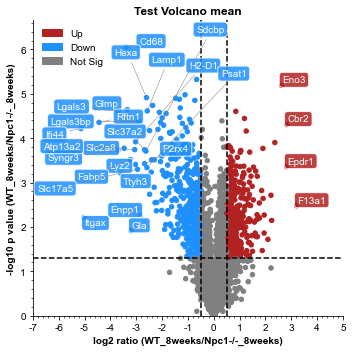

In [29]:
pp.volcano_plot(df_ratio_pval=df_ratio_pval,
                col_pval="-log10 p value (WT_8weeks/Npc1-/-_8weeks)",
                col_ratio="log2 ratio (WT_8weeks/Npc1-/-_8weeks)",
                th_filter=(0.05, 0.5),
                th_text=(0.05, -2.5, 2.5),
                force=(0.9, 0.50, 0.25),
                avoid_conflict=0.2,
                precision=0.01,
                box=True,
                verbose=True,
                label_bold=False,
                label_size=10,
                filled_circle=True,
                title="Test_Volcano_mean",
                fig_format="svg")
plt.show()